In [18]:
import os
import sys  
import pandas as pd
import PredictorOptimize

In [16]:
df = pd.read_csv('train.csv')
population = pd.read_csv('WorldPopulation/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv')
p_density = pd.read_csv('WorldPopulation/API_EN.POP.DNST_DS2_en_csv_v2_887474.csv')
population_density = pd.merge(population[['Country Code','Country Name','2018']], p_density[['Country Code','2018']], on = 'Country Code')
population_density.columns = ['Country Code', 'Country Name', 'Population', 'Density']


In [17]:
population_density

,Country Code,Country Name,Population,Density
0,ABW,Aruba,1.058450e+05,588.027778
1,AFG,Afghanistan,3.717239e+07,56.937760
2,AGO,Angola,3.080976e+07,24.713052
3,ALB,Albania,2.866376e+06,104.612263
4,AND,Andorra,7.700600e+04,163.842553
5,ARB,Arab World,4.197906e+08,37.372365
6,ARE,United Arab Emirates,9.630959e+06,135.609110
7,ARG,Argentina,4.449450e+07,16.258510
8,ARM,Armenia,2.951776e+06,103.680225
9,ASM,American Samoa,5.546500e+04,277.325000


In [9]:
df['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18'], dtype=object)

(<matplotlib.axes._subplots.AxesSubplot at 0x17289d0da90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1728ad2c4a8>)

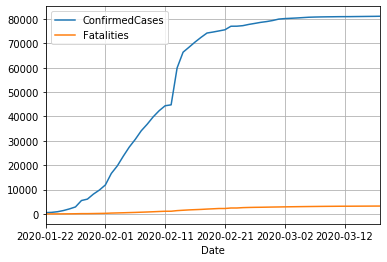

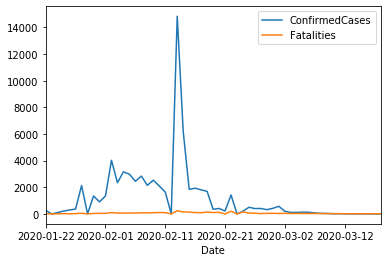

In [59]:
#%%
df_china = df[df['Country/Region'] == 'China'][['Date','Province/State','ConfirmedCases','Fatalities']]
df_china.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_china.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_china.groupby(['Province/State','Date'])['ConfirmedCases','Fatalities'].sum().diff())
df_acumed_daycases.plot(grid=True),df_diff_daycases.loc['Hubei'].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x17289d0a630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1728adfb780>)

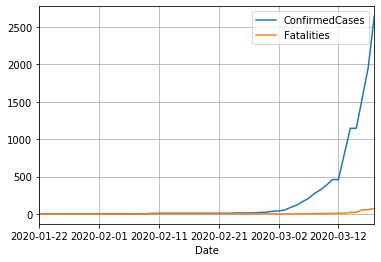

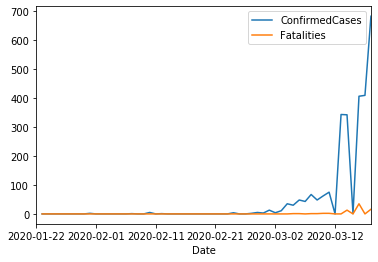

In [60]:
#%%
Country = 'United Kingdom'
df_c = df[df['Country/Region'] == Country][['Date','Province/State','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
df_acumed_daycases.plot(grid=True),df_diff_daycases.plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1728ae88f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1728aed8cf8>)

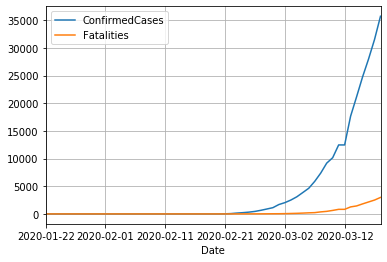

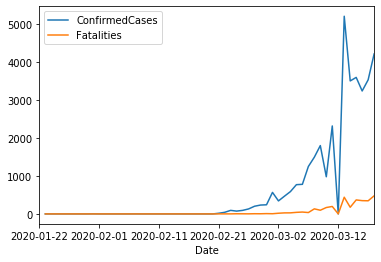

In [61]:
#%%
Country = 'Italy'
df_c = df[df['Country/Region'] == Country][['Date','Province/State','ConfirmedCases','Fatalities']]
df_c.set_index('Date', inplace=True)
df_acumed_daycases = pd.DataFrame(df_c.groupby('Date')['ConfirmedCases','Fatalities'].sum())
df_diff_daycases = pd.DataFrame(df_c.groupby(['Date'])['ConfirmedCases','Fatalities'].sum().diff())
df_acumed_daycases.plot(grid=True),df_diff_daycases.plot()

In [35]:
pd.DataFrame(df_china.groupby(['Province/State','Date'])['ConfirmedCases'].sum().diff())

ConfirmedCases
Province/State Date                      
Anhui          2020-01-22             NaN
               2020-01-23             8.0
               2020-01-24             6.0
               2020-01-25            24.0
               2020-01-26            21.0
               2020-01-27            10.0
               2020-01-28            36.0
               2020-01-29            46.0
               2020-01-30            48.0
               2020-01-31            37.0
               2020-02-01            60.0
               2020-02-02            43.0
               2020-02-03            68.0
               2020-02-04            72.0
               2020-02-05            50.0
               2020-02-06            61.0
               2020-02-07            74.0
               2020-02-08            68.0
               2020-02-09            46.0
               2020-02-10            51.0
               2020-02-11            30.0
               2020-02-12            29.0
               2020-02-13            21.0
               2020-02-14            24.0
               2020-02-15            16.0
               2020-02-16            12.0
               2020-02-17            11.0
               2020-02-18             9.0
               2020-02-19             4.0
               2020-02-20             1.0
...                                   ...
Zhejiang       2020-02-18             1.0
               2020-02-19             2.0
               2020-02-20             1.0
               2020-02-21            28.0
               2020-02-22             2.0
               2020-02-23             0.0
               2020-02-24             0.0
               2020-02-25             0.0
               2020-02-26             0.0
               2020-02-27             0.0
               2020-02-28             0.0
               2020-02-29             0.0
               2020-03-01             0.0
               2020-03-02             1.0
               2020-03-03             7.0
               2020-03-04             0.0
               2020-03-05             2.0
               2020-03-06             0.0
               2020-03-07             0.0
               2020-03-08             0.0
               2020-03-09             0.0
               2020-03-10             0.0
               2020-03-11             0.0
               2020-03-12             0.0
               2020-03-13             0.0
               2020-03-14            12.0
               2020-03-15             4.0
               2020-03-16             0.0
               2020-03-17             1.0
               2020-03-18             0.0

[1881 rows x 1 columns]

In [25]:
df.groupby(['Country/Region','Province/State'])['ConfirmedCases'].sum()

Country/Region  Province/State              
Australia       Australian Capital Territory       10.0
                From Diamond Princess              55.0
                New South Wales                  1519.0
                Northern Territory                 11.0
                Queensland                        691.0
                South Australia                   280.0
                Tasmania                           58.0
                Victoria                          708.0
                Western Australia                 192.0
Canada          Alberta                           383.0
                British Columbia                  993.0
                Grand Princess                     25.0
                Manitoba                           42.0
                New Brunswick                      31.0
                Newfoundland and Labrador           8.0
                Nova Scotia                        24.0
                Ontario                          1282.0
   

In [80]:
new_df.set_index('Date', inplace=True)

In [81]:
new_df.astype('float')

,PARAMETER_ESTIMATE
Date,
2019-05-13,-4.7593
2019-06-13,-4.7471
2019-07-13,-4.6321
2019-08-13,-4.6613
2019-09-13,-4.4920
2019-10-13,-4.7900
2019-11-13,-4.6420
2019-12-13,-4.7312
2020-01-13,-4.8876


In [82]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
df_train = new_df.drop(new_df.tail(1).index, inplace=False) 
# load dataset
series = df_train.astype('float')
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=5, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [83]:
print(X)

[[ 0.0122]
 [ 0.115 ]
 [-0.0292]
 [ 0.1693]
 [-0.298 ]
 [ 0.148 ]
 [-0.0892]
 [-0.1564]
 [ 0.2477]]


In [84]:
print(sum(X)/len(X))

[0.01326667]


In [85]:
[series.values[-1]]

[array([-4.6399])]

In [86]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[-0.0354333  -0.66667201  0.22065944  0.50854369 -0.34165519  0.12682167]
[[-4.6399]]


In [87]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: -5.008699


In [88]:
new_df.tail(1)

,PARAMETER_ESTIMATE
Date,
2020-03-13,-4.439


In [89]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = df_train.astype('float')
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

10   -4.841359
dtype: float64
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [90]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = df_train.astype('float')
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

10   -4.64213
dtype: float64
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = df_train.astype('float')
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

10   -4.64213
dtype: float64
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
f:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [92]:
data

,PARAMETER_ESTIMATE
Date,
2019-05-13,-4.7593
2019-06-13,-4.7471
2019-07-13,-4.6321
2019-08-13,-4.6613
2019-09-13,-4.4920
2019-10-13,-4.7900
2019-11-13,-4.6420
2019-12-13,-4.7312
2020-01-13,-4.8876


In [138]:
data = df_train.astype('float').values
	# data split
n_test = 3
# model configs
cfg_list = PredictorOptimize.exp_smoothing_configs(seasonal=[None])
# grid search

#walk_forward_validation(data, n_test, cfg)

scores = PredictorOptimize.grid_search(data[:,0], cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

> Model[['add', True, None, None, False, True]] 0.623
 > Model[['add', True, None, None, False, False]] 0.175
 > Model[['add', False, None, None, False, True]] 0.623
 > Model[['add', False, None, None, False, False]] 0.186
 > Model[[None, False, None, None, False, True]] 0.549
 > Model[[None, False, None, None, False, False]] 0.176
done
['add', True, None, None, False, False] 0.1754870186730296
[None, False, None, None, False, False] 0.17629251659641273
['add', False, None, None, False, False] 0.1857730899070298


In [130]:
data = new_df.astype('float').values
	# data split
n_test = 3
# model configs
cfg_list = PredictorOptimize.exp_smoothing_configs(seasonal=[None])
# grid search

#walk_forward_validation(data, n_test, cfg)

scores = PredictorOptimize.grid_search(data[:,0], cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

> Model[['add', True, None, None, False, True]] 0.737
 > Model[['add', True, None, None, False, False]] 0.225
 > Model[['add', False, None, None, False, True]] 0.738
 > Model[['add', False, None, None, False, False]] 0.237
 > Model[[None, False, None, None, False, True]] 0.680
 > Model[[None, False, None, None, False, False]] 0.226
done
['add', True, None, None, False, False] 0.2249471841412778
[None, False, None, None, False, False] 0.22588994854105948
['add', False, None, None, False, False] 0.2370129759551018


In [145]:
sum(data)/len(data)

array([-4.69825])

In [150]:
PredictorOptimize.exp_smoothing_forecast(data, ['additive', True, 2, None, False, False])

-4.642129807658069

In [97]:
data

array([[-4.7593],
       [-4.7471],
       [-4.6321],
       [-4.6613],
       [-4.492 ],
       [-4.79  ],
       [-4.642 ],
       [-4.7312],
       [-4.8876],
       [-4.6399],
       [-4.439 ]])

In [98]:
new_df

,PARAMETER_ESTIMATE
Date,
2019-05-13,-4.7593
2019-06-13,-4.7471
2019-07-13,-4.6321
2019-08-13,-4.6613
2019-09-13,-4.492
2019-10-13,-4.79
2019-11-13,-4.642
2019-12-13,-4.7312
2020-01-13,-4.8876


In [99]:
import numpy as np
b=np.array([[PredictorOptimize.exp_smoothing_forecast(data, ['add', True, None, None, False, False])]])
data = np.concatenate((data, b))
#add([exp_smoothing_forecast(data, ['add', True, None, None, False, False])])
data

array([[-4.7593    ],
       [-4.7471    ],
       [-4.6321    ],
       [-4.6613    ],
       [-4.492     ],
       [-4.79      ],
       [-4.642     ],
       [-4.7312    ],
       [-4.8876    ],
       [-4.6399    ],
       [-4.439     ],
       [-4.44037225]])

In [100]:
PredictorOptimize.exp_smoothing_forecast(data, ['add', True, None, None, False, False])

-4.44037224892244

In [101]:
config = scores[:1][0][0]
config

"['add', True, None, None, False, False]"

In [127]:
n_test = 3
def predict_n_steps(data, n_steps, use_new_model = True):
    data_history = data
    cfg_list = PredictorOptimize.exp_smoothing_configs(seasonal=[0,6,12])
    scores = PredictorOptimize.grid_search(data[:,0], cfg_list, n_test)
    config = scores[:1][0][0]
    if use_new_model == True:
        for i in range(n_steps):
            new = np.array([[PredictorOptimize.exp_smoothing_forecast(data_history,ast.literal_eval(config))]])
            data_history = np.concatenate((data_history, new))
    else:
        t,d,s,p,b,r = ast.literal_eval(config)
        model = ExponentialSmoothing(data_history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
        model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
        for i in range(n_steps):            
            yhat = np.array([model_fit.predict(len(data_history), len(data_history))])            
            data_history = np.concatenate((data_history, yhat))            
    return data_history

In [128]:
predict_n_steps(data,4)

> Model[['add', True, None, 0, False, True]] 0.653
 > Model[['add', True, None, 0, False, False]] 0.205
 > Model[['add', True, None, 6, False, True]] 0.653
 > Model[['add', True, None, 6, False, False]] 0.205
 > Model[['add', True, None, 12, False, True]] 0.653
 > Model[['add', True, None, 12, False, False]] 0.205
 > Model[['add', False, None, 0, False, True]] 0.653
 > Model[['add', False, None, 0, False, False]] 0.214
 > Model[['add', False, None, 6, False, True]] 0.653
 > Model[['add', False, None, 6, False, False]] 0.214
 > Model[['add', False, None, 12, False, True]] 0.653
 > Model[['add', False, None, 12, False, False]] 0.214
 > Model[[None, False, 'add', 6, False, True]] 0.566
 > Model[[None, False, 'add', 6, False, False]] 0.659
 > Model[[None, False, None, 0, False, True]] 0.594
 > Model[[None, False, None, 0, False, False]] 0.206
 > Model[[None, False, None, 6, False, True]] 0.594
 > Model[[None, False, None, 6, False, False]] 0.206
 > Model[[None, False, None, 12, False, True

array([[-4.7593    ],
       [-4.7471    ],
       [-4.6321    ],
       [-4.6613    ],
       [-4.492     ],
       [-4.79      ],
       [-4.642     ],
       [-4.7312    ],
       [-4.8876    ],
       [-4.6399    ],
       [-4.439     ],
       [-4.44037225],
       [-4.44037225],
       [-2.9632595 ],
       [-3.0162364 ]])

In [129]:
predict_n_steps(data,4,False)

> Model[['add', True, None, 0, False, True]] 0.653
 > Model[['add', True, None, 0, False, False]] 0.205
 > Model[['add', True, None, 6, False, True]] 0.653
 > Model[['add', True, None, 6, False, False]] 0.205
 > Model[['add', True, None, 12, False, True]] 0.653
 > Model[['add', True, None, 12, False, False]] 0.205
 > Model[['add', False, None, 0, False, True]] 0.653
 > Model[['add', False, None, 0, False, False]] 0.214
 > Model[['add', False, None, 6, False, True]] 0.653
 > Model[['add', False, None, 6, False, False]] 0.214
 > Model[['add', False, None, 12, False, True]] 0.653
 > Model[['add', False, None, 12, False, False]] 0.214
 > Model[[None, False, 'add', 6, False, True]] 0.566
 > Model[[None, False, 'add', 6, False, False]] 0.659
 > Model[[None, False, None, 0, False, True]] 0.594
 > Model[[None, False, None, 0, False, False]] 0.206
 > Model[[None, False, None, 6, False, True]] 0.594
 > Model[[None, False, None, 6, False, False]] 0.206
 > Model[[None, False, None, 12, False, True

array([[-4.7593    ],
       [-4.7471    ],
       [-4.6321    ],
       [-4.6613    ],
       [-4.492     ],
       [-4.79      ],
       [-4.642     ],
       [-4.7312    ],
       [-4.8876    ],
       [-4.6399    ],
       [-4.439     ],
       [-4.44037225],
       [-4.44037225],
       [-4.44037225],
       [-4.44037225]])